In [1]:
!pip install easyocr
!pip install imutils

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
import easyocr

### Read Image

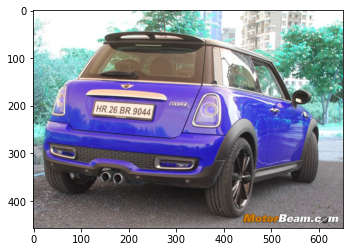

In [3]:
img=cv2.imread('image1.jpg')
# img=cv2.imread('image2.jpg')
# img=cv2.imread('image3.jpg')
# img=cv2.imread('image4.jpg')
plt.imshow(img)

### Convert to Grayscale Image

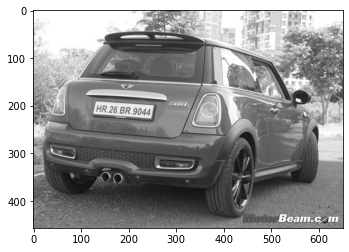

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
# plt.imshow(gray)

### Apply filter and find the Edges for Localization

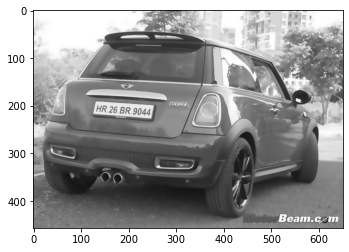

In [5]:
# Noise reduction

# Averaging and Median filter reduces noise but edge info is lost. A bilateral filter is used for smoothening images and reducing noise, while preserving edges.

# Apply bilateral filter with d (diameter of pixel neighbour) = 17,sigmaColor = sigmaSpace = 17
# The smaller the value of sigma  , the sharper the edge. As sigma  tends to infinity, the equation tends to a Gaussian blur.

bfilter = cv2.bilateralFilter(gray,11,17,17)
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))

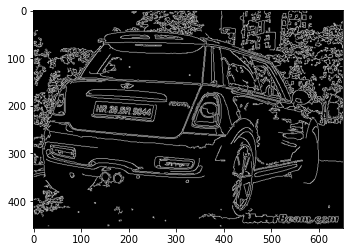

In [6]:
# Edge detection

t_lower = 30 # Lower Threshold
t_upper = 200 # Upper threshold
aperture_size = 5 # Aperture size (The default value is 3 and its value should be odd between 3 and 7. Can increase the Aperture size to detect more detailed features.)

# edged = cv2.Canny(bfilter,t_lower,t_upper,aperture_size, L2gradient =True )
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### Find Contours and Apply Mask

In [7]:
# Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity.

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [8]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [9]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [10]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

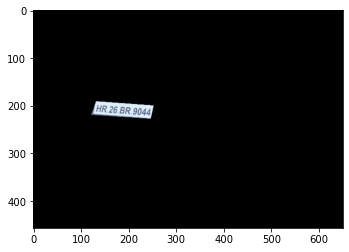

In [11]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [12]:
# Cropping the image

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

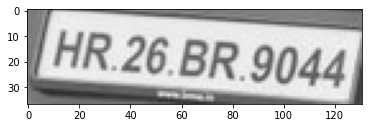

In [13]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### Use Easy OCR To Read Text

In [14]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\z032836\Anaconda3\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
C:\Users\z032836\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\z032836\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5728024956877317)]

### Result

In [15]:
text = result[0][-2]
text

'HR.26 BR.9044'

In [16]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)

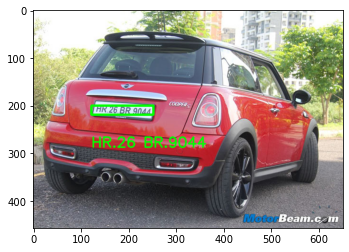

In [17]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))